In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
def show_orignal_images(pixels):
    #Displaying Orignal Images
    fig, axes = plt.subplots(6, 10, figsize=(11, 7),
                         subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

In [4]:
def show_eigenfaces(pca):
    #Displaying Eigenfaces
    fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
        ax.set_title("PC " + str(i+1))
    plt.show()

In [15]:
df = pd.read_csv("face_data.csv")
targets = df["target"]
pixels = df.drop(["target"],axis=1)
print(np.array(pixels).shape)
print(df['target'])

(400, 4096)
0       0
1       0
2       0
3       0
4       0
       ..
395    39
396    39
397    39
398    39
399    39
Name: target, Length: 400, dtype: int64


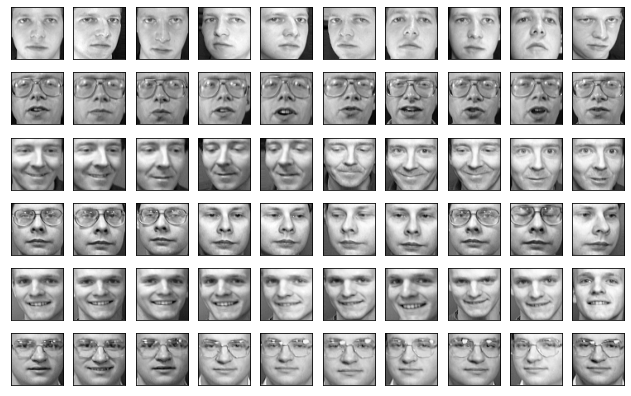

In [8]:
show_orignal_images(pixels)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(pixels, targets)


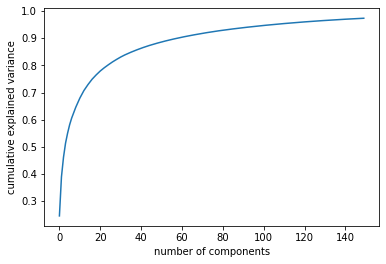

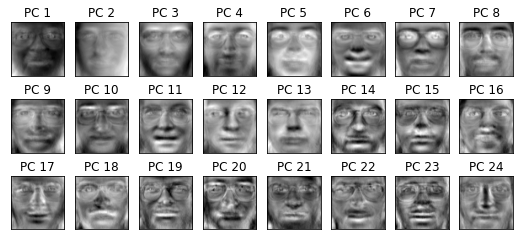

In [14]:
pca = PCA(n_components=150).fit(x_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
show_eigenfaces(pca)

In [11]:
print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(x_train)


Projecting the input data on the eigenfaces orthonormal basis


In [12]:
clf = SVC(kernel='rbf',C=1000,gamma=0.001)
clf = clf.fit(Xtrain_pca, y_train)

In [13]:
print("Predicting people's names on the test set")
t0 = time()
Xtest_pca = pca.transform(x_test)
y_pred = clf.predict(Xtest_pca)
print("done in %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred))

Predicting people's names on the test set
done in 0.209s
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         5
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         2
          16       1.00 

c:\users\chaku\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
